Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [4]:
NAME = "Nazar Yaremko"
COLLABORATORS = ""

---

# CS110 Pre-class Work 10.2

## Question 1.

# Question 1. 

Fill in the code below for the method `insert` for a node in a BST. This should be a matter of copy-paste, as this is part of the pre-class work for lesson 8.2

In [5]:
## Binary Search Tree
##
class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

    def insert(self, node):
        #this function inserts objects into a binary tree
        """inserts a node into a *non-empty* tree rooted at the node, returns
        the root"""
        #if the node is bigger than the key
        if self.data > node.data:
            #and there is no left child
            if self.l_child is None:
                #we insert they key as the left child
                self.l_child = node
                node.parent = self
                
            else:
                #or if there is a left child, we reiterate the previoussteps
                #this is kind of a recursive call
                self.l_child.insert(node)
        else:
            #here we proceed if the key is larger than the root
            #the operations are the same as in the previous case
            if self.r_child is None:
                self.r_child = node
                node.parent = self
            else:
                self.r_child.insert(node)
        return self

## Question 2. 

Below you are provided the code for insertion in an AVL tree. However, to make it work, you need to complete the functions `left_rotate` and `right_rotate`. Use the pseudo-code `LEFT-ROTATE` in Cormen et al. and the one you wrote for `RIGHT-ROTATE` from lesson 10.1 to fill in the code.

In [42]:

## AVL Tree
##
class AVLNode(Node):
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val
        self.lr_balance = 0
        self.height = 0
    
    def get_violating_node(self, root):
        if self == root:
            return None
        if self == self.parent.r_child:
            if not self.parent.l_child:
                self.parent.height = max(-1, self.height) + 1
                self.parent.lr_balance = -1-self.height
            else:
                self.parent.height = max(self.parent.l_child.height, self.height) + 1
                self.parent.lr_balance = self.parent.l_child.height-self.height
        else:
            if not self.parent.r_child:
                self.parent.height = max(-1, self.height) + 1
                self.parent.lr_balance = self.height + 1
            else:
                self.parent.height = max(self.parent.r_child.height, self.height) + 1
                self.parent.lr_balance = self.height-self.parent.r_child.height
        if abs(self.parent.lr_balance) > 1:
            return self.parent
        else:
            return self.parent.get_violating_node(root)
                

    def insert(self, node):
        """inserts a node into a *non-empty* tree rooted at the node, returns the root"""

        violating_node = None
        curr_node = self
        root = self
        while curr_node:
            if curr_node.data > node.data:
                if curr_node.l_child is None:
                    curr_node.l_child = node
                    node.parent = curr_node
                    break
                else:
                    curr_node = curr_node.l_child 
            else:   
                if curr_node.r_child is None:
                    curr_node.r_child = node
                    node.parent = curr_node
                    break
                else:
                    curr_node = curr_node.r_child
        # fix up the tree
        violating_node = node.get_violating_node(root)
        
        while violating_node:
            x = violating_node
            if x.lr_balance < 0: # right heavy
                y = x.r_child
                if y.lr_balance < 0:
                    root = left_rotate(x, root)
                    x.lr_balance = 0
                    x.height -= 2
                    y.lr_balance = 0
                elif y.lr_balance == 0:
                    root = left_rotate(x, root)
                    x.lr_balance = -1
                    x.height -= 1
                    y.lr_balance = 1
                    y.height += 1 
                else:
                    z = x.r_child
                    y = z.l_child
                    root = right_rotate(z, root)
                    root = left_rotate(x, root)
                    x.height -= 2
                    y.lr_balance = 0
                    y.height += 1
                    z.height -= 1 
                    if y.lr_balance == -1: 
                        x.lr_balance = 1
                        z.lr_balance = 0
                    elif y.lr_balance == 0: 
                        x.lr_balance = 0
                        z.lr_balance = 0
                    else: 
                        x.lr_balance = 0
                        z.lr_balance = -1 
       
            else:
                y = x.l_child
                if y.lr_balance > 0:
                    root = right_rotate(x, root)
                    x.lr_balance = 0
                    x.height -= 2
                    y.lr_balance = 0
                elif y.lr_balance == 0:
                    root = right_rotate(x, root)
                    x.lr_balance = 1
                    x.height -= 1
                    y.lr_balance = -1
                    y.height += 1
                else:
                    z = x.l_child 
                    y = z.r_child
                    root = left_rotate(z, root)
                    root = right_rotate(x, root)
                    x.height -= 2
                    y.lr_balance = 0
                    y.height += 1
                    z.height -= 1
                    if y.lr_balance == -1: # B: k-2, C: k-1
                        x.lr_balance = 0
                        z.lr_balance = 1
                    elif y.lr_balance == 0: # B=C=k-1
                        x.lr_balance = 0
                        z.lr_balance = 0
                    else: # B: k-1, C: k-2
                        x.lr_balance = -1
                        z.lr_balance = 0
            if root == y: 
                violating_node = None
                continue
            elif y == y.parent.l_child:
                y.parent.lr_balance = y.height - y.parent.r_child.height
                y.parent.height = max(y.height, y.parent.r_child.height) + 1
            elif y == y.parent.r_child:
                y.parent.lr_balance = y.parent.l_child.height - y.height
                y.parent.height = max(y.parent.l_child.height, y.height) + 1
            if abs(y.parent.lr_balance) > 1:
                violating_node = y.parent
            else: violating_node = None 
        return root
    
    def depth(self, node, lst): 
        #here I check whether the the node we are looking for is not the root node itself
        if self.data == node: 
            #if yes, than the depth is 0
            return 0
        else:
            #if the node is bigger than the root, then we recursively call on the right side
            if node > self.data:
                #and append 1 to the list we created to keep track of how many comparisons we make
                lst.append(1)
                self.r_child.depth(node,lst)
            else:
                #same for the left side, if the node is smaller than the root
                lst.append(1)
                self.l_child.depth(node,lst)
        #returning the depth of the tree 
        return sum(lst)-1    

def left_rotate(x, root):
    #setting y to be right child of x
    y = x.r_child
    #setting right child of x to be y's left child
    x.r_child = y.l_child
    
    #if left child of y is not Nil
    if y.l_child != None:
        #then y's sibiling becomes x
        y.l_child.parent = x
    #and y is becoming x's parent
    y.parent = x.parent
    
    #if x's parent is Nil
    if x.parent == None:
        #then root becomes y
        root = y
    #if x is equal to it's sibiling
    elif x == x.parent.l_child:
        #y becomes the sibiling of x
        x.parent.l_child = y
    else: 
        x.parent.r_child = y
    
    #in the send we set y's left child to be x
    y.l_child = x
    #and parent of x to be y
    x.parent = y
    return root


In [47]:
def right_rotate(x, root):
    #setting y to bee x's left child
    y = x.l_child
    #setting x's left child to be y's right child
    x.l_child = y.r_child
    
    #if right child of y is not Nil
    if y.r_child != None:
        #y's sibiling becomes x
        y.r_child.parent = x
        
    #and x's parent becomes y's parent
    y.parent = x.parent
    #if parent of x is Nil
    if x.parent == None:
        #y becomes a root
        root = y
    #or if x is equal to it's sibiling
    elif x == x.parent.r_child:
        #then y becomes x's sibiling
        x.parent.r_child = y
    else: 
        x.parent.l_child = y
    
    #finally x becomes y's right child
    y.r_child = x
    #and y becomes x's parent
    x.parent = y
    return root

## Question 3.
We will now use the code above to build a BST and an AVL by randomly inserting to the trees, then produce a plot to compare their expected heights. **Carefully** follow the instructions below to fill in the code.

### Question 3a.

Complete the function `height` to compute the height of a tree rooted at a node. This should also be a matter of copying and pasting because you can utilize what you wrote for `max_depth` in lesson 9.1 (recall that maximum depth of a tree rooted at a node is the node's height in the tree.)

In [53]:
import random
import numpy as np
import matplotlib.pyplot as plt

def depth(root, node):
    #setting
    depth = 0
    while node != root:
        node = node.parent
        depth += 1
    return depth 

def height(node):
    lst = [-float('inf')]
    root = node
    tree_root = node

    def sub_max_depth(root):
        if not root is None:
            sub_max_depth(root.l_child)
            d = depth(tree_root,root)
            if d > lst[0]:
                lst[0] = d
            sub_max_depth(root.r_child)
    sub_max_depth(root)
    return lst[0]

# Question 3b.
Fill in the `get_expected_height_stats` function below to get the data ready for plotting. You need to follow the template and the instructions written in the code to produce consistent data to plot. 

In [54]:
import random 

def get_expected_height_stats(iterations):
    bst_expected_heights = []
    avl_expected_heights = []
    
    for n in range(1,500,10):
        bstsum = 0
        avlsum = 0
        for i in range(iterations):
            vals = list(range(int(n)))
            random.seed(i)
            random.shuffle(vals)
            
            BSTnodes = [Node(val) for val in vals]
            AVLnodes = [AVLNode(val) for val in vals]
        
            bsttree = BSTnodes[0]
            avltree = AVLnodes[0]
        
            for k in range(1, len(BSTnodes)):
                bsttree.insert(BSTnodes[k])
                avltree.insert(AVLnodes[k])
            bstsum += height(bsttree)
            avlsum += height(avltree)
            
        # For each value of n, you need to insert n nodes to each tree for 
        # `iterations` times. For each iteration:
            # 1. Create a list containing all integers from 0 to n-1
            # 2. SET A RANDOM SEED TO THE INDEX OF THE CURRENT ITERATION and
            # shuffle the list. For example, if your code is `for i in range(iterations)`,
            # then use random.seed(i). Also, see the sample code in the next step.
            # 3. Create BST nodes and AVL nodes taking the values from the list 
            # and insert those nodes to the respective trees IN THAT ORDER.
            # Do make use of these lines of code:
                # vals = list(range(int(n)))
                # random.seed(i)
                # random.shuffle(vals)
                # BSTnodes = [Node(val) for val in vals]
                # AVLnodes = [AVLNode(val) for val in vals]
            # 4. After inserting to both trees, compute the heights.
                
        # YOUR CODE HERE
        bst_expected_heights.append(bstsum/n)
        bst_expected_heights.append(avlsum/n)
    return bst_expected_heights, avl_expected_heights

In [55]:
bst_expected_heights, avl_expected_heights = get_expected_height_stats(10)

assert(bst_expected_heights == [0.0, 5.3, 6.8, 7.8, 9.9, 10.2, 9.9, 11.2, 12.0, 12.2, 12.3, 
                                12.2, 12.1, 13.4, 13.2, 13.0, 14.3, 14.7, 13.8, 14.1, 14.5, 
                                15.5, 14.9, 16.0, 16.1, 16.2, 15.4, 17.5, 16.7, 16.1, 16.4, 
                                17.4, 16.1, 17.3, 16.8, 16.2, 16.7, 17.5, 17.1, 18.4, 17.5, 
                                17.0, 17.8, 18.4, 18.3, 17.8, 17.7, 17.3, 18.0, 19.5])
assert(avl_expected_heights == [0.0, 3.0, 4.1, 5.0, 5.4, 6.0, 6.0, 6.1, 6.8, 6.9, 7.0, 7.0, 
                                7.3, 7.3, 7.5, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.2, 8.2, 8.0, 
                                8.4, 8.5, 8.7, 8.8, 8.9, 8.8, 8.9, 9.0, 9.0, 9.0, 9.0, 9.0, 
                                9.0, 9.0, 9.3, 9.1, 9.1, 9.3, 9.3, 9.7, 9.5, 9.6, 9.8, 9.8, 
                                9.9, 9.8])


AssertionError: 

If you have done everything correctly, running the following code will produce a plot that compares the expected heights of BST and AVL tree. 

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

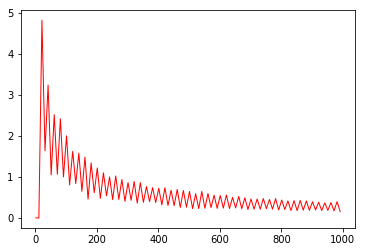

In [56]:
bst_expected_heights, avl_expected_heights = get_expected_height_stats(10)

plt.plot(range(1,1000,10), bst_expected_heights, color = 'red',label = 'BST', linewidth = 1.0)
plt.plot(range(1,1000,10), avl_expected_heights, color = 'blue',label = 'AVL', linewidth = 1.0)
plt.xlabel('$N$', fontsize=10)
plt.ylabel('Expected height', fontsize=10)
plt.legend()